In [1]:
import pandas as pd
from sklearn import preprocessing


In [2]:
training_features = pd.read_csv('training_set_features.csv')
training_labels = pd.read_csv('training_set_labels.csv')
training_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [8]:
# clean data
# do not drop lines but dropping columns is ok


def cleanData(df : pd.DataFrame):
    # drop employment_industry and employment_occupation because nearly 50% NaNs and filled with dummy-text
    df.drop(['employment_industry', 'employment_occupation'], axis = 1, inplace=True)
    
    ## care for NaNs
    # fill NaN in health-insurance, doctor_recc_h1n1, doctor_recc_seasonal with value 0
    df[['health_insurance','doctor_recc_h1n1','doctor_recc_seasonal']]=df[['health_insurance','doctor_recc_h1n1','doctor_recc_seasonal']].fillna(0)
    # fill NaN in income-poverty with 'missing'
    df['income_poverty']=df['income_poverty'].fillna('missing')
    # fill NaN in rent_or_own with own
    df['rent_or_own']=df['rent_or_own'].fillna('own')
    #fill NaN in employment_status with 'missing'
    df['employment_status']=df['employment_status'].fillna('missing')
    #fill NaN in marital_status with 'missing'
    df['marital_status']=df['marital_status'].fillna('missing')
    #fill NaN in education with 'missing'
    df['education']=df['education'].fillna('College Graduate')
    #fill NaN in household_children and household_adults with 'missing'
    df[['household_children', 'household_adults']]=df[['household_children', 'household_adults']].fillna('missing')
    #fil NaN in opinion_seas_sick_from_vacc, opinion_seas_risk and opinion_seas_vacc_effective with missing
    df[['opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'opinion_seas_vacc_effective']] = df[['opinion_seas_sick_from_vacc','opinion_seas_risk', 'opinion_seas_vacc_effective']].fillna('missing')
    #fil NaN in opinion_h1n1_sick_from_vacc, oopinion_h1n1_risk and opinion_seas_vacc_effective with missing
    df[['opinion_h1n1_sick_from_vacc', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective']] = df[['opinion_h1n1_sick_from_vacc', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective']].fillna('missing')
    #fill NaN in health_worker with 0
    df['health_worker']=df['health_worker'].fillna(0)
    #fill NaN in child_under_6_months with 0
    df['child_under_6_months']=df['child_under_6_months'].fillna(0)
    #fill NaN in chronic_med_condition with 'missing'
    df['chronic_med_condition']=df['chronic_med_condition'].fillna('missing')
    #fill NaN in behavorial flags with 'missing'
    df[['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face']]=df[['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face']].fillna('missing')
    #fill NaN in h1ns_knowledge with 'missing'
    df['h1n1_knowledge']=df['h1n1_knowledge'].fillna('missing')
    #fill NaN in h1ns_knowledge with 'missing'
    df['h1n1_knowledge']=df['h1n1_knowledge'].fillna('missing')
    #fill NaN in h1ns_concern with 'missing'
    df['h1n1_concern']=df['h1n1_concern'].fillna('missing')
    
    #set correct data-types
    df = df.astype('str')
    
    #one hot-encoding of non-binary collumns
    non_binary_collumns = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','age_group','education','race','sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','household_adults','household_children']
    for collumn in non_binary_collumns:
        one_hot_df = pd.get_dummies(df[collumn],prefix=collumn)
        df = pd.concat((df, one_hot_df), axis=1)      
        df = df.drop(collumn, axis=1)
    
    #handle categorical-data
    le = preprocessing.LabelEncoder()
    list_of_categorical_columns = df.select_dtypes(['object']).columns
    for column in list_of_categorical_columns:
        df[column] = le.fit_transform(df[column]) 
        
    df = df.set_index('respondent_id')
    
    
    
    
    return df

trainingData = pd.merge(training_features, training_labels, on= 'respondent_id')
cleaned_trainingData = cleanData(trainingData)
cleaned_trainingData.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,...,household_adults_0.0,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_adults_missing,household_children_0.0,household_children_1.0,household_children_2.0,household_children_3.0,household_children_missing
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
11112,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
18930,0,1,0,1,1,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
20041,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [6]:
def findUnfilledCollumns(df : pd.DataFrame):
    print(df.isnull().sum(axis = 0))
    return

findUnfilledCollumns(cleaned_trainingData)

respondent_id                 0
behavioral_antiviral_meds     0
behavioral_avoidance          0
behavioral_face_mask          0
behavioral_wash_hands         0
                             ..
household_children_0.0        0
household_children_1.0        0
household_children_2.0        0
household_children_3.0        0
household_children_missing    0
Length: 113, dtype: int64


In [9]:
cleaned_trainingData.describe()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,...,household_adults_0.0,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_adults_missing,household_children_0.0,household_children_1.0,household_children_2.0,household_children_3.0,household_children_missing
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,0.054031,0.735537,0.070356,0.827461,0.363987,0.342420,0.683604,0.202494,0.303067,0.345677,...,0.301644,0.541955,0.104954,0.042124,0.009323,0.699143,0.118883,0.107238,0.065414,0.009323
std,0.237551,0.458374,0.258518,0.381995,0.487878,0.480955,0.475272,0.401866,0.459592,0.546727,...,0.458980,0.498246,0.306500,0.200875,0.096108,0.458639,0.323656,0.309421,0.247259,0.096108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


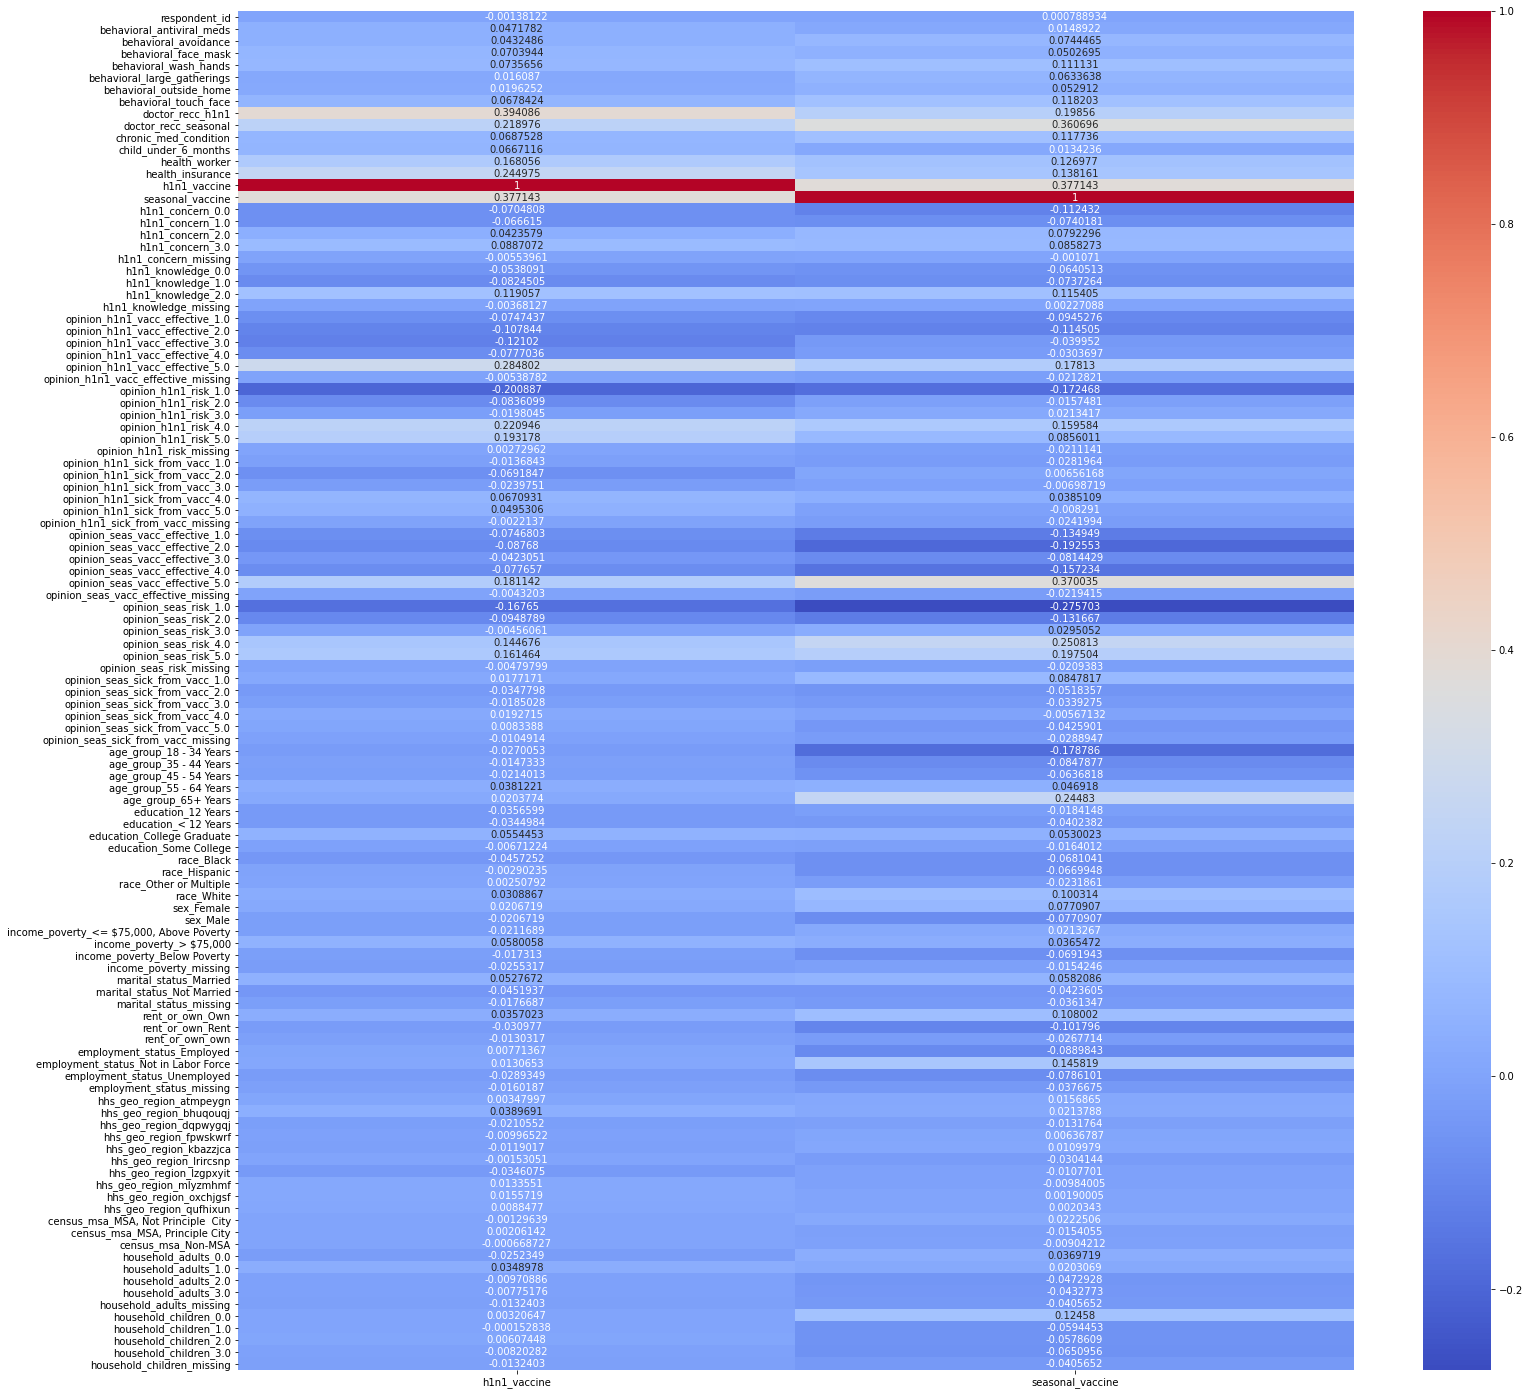

In [6]:
#check correlation
import seaborn as sns
import matplotlib as plt

def createCorrelationHeatmap(df : pd.DataFrame):
    fig = plt.pyplot.gcf() 
    fig.set_size_inches(25,25)
    data = pd.DataFrame(df.corr()[['h1n1_vaccine','seasonal_vaccine']])
    sns.heatmap(data, annot = True, fmt='g',cmap= 'coolwarm')
    return

createCorrelationHeatmap(cleaned_trainingData)

## Classifiers

In [4]:
# use gradient tree boost classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))


h1n1_accuracy: 0.8526208304969367
seasonal_accuracy: 0.7837531200363059


In [5]:
# use k-nearest-neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = KNeighborsClassifier().fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = KNeighborsClassifier().fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))


h1n1_accuracy: 0.7591331971862946
seasonal_accuracy: 0.5339233038348082


In [6]:
# use AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = AdaBoostClassifier().fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = AdaBoostClassifier().fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))

h1n1_accuracy: 0.8509189925119128
seasonal_accuracy: 0.7826185613796234


In [8]:
# use naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = GaussianNB().fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = GaussianNB().fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))

h1n1_accuracy: 0.8112094395280236
seasonal_accuracy: 0.7430224642614023


In [9]:
# use decision-tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = DecisionTreeClassifier(random_state=42).fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = DecisionTreeClassifier(random_state=42).fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))

h1n1_accuracy: 0.7659405491263899
seasonal_accuracy: 0.6813024733378715


In [10]:
# use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)

clf_h1n1 = RandomForestClassifier(random_state=42).fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)


clf_seasonal = RandomForestClassifier(random_state=42).fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))

h1n1_accuracy: 0.8493306103925573
seasonal_accuracy: 0.7804628999319265


In [ ]:
#use neural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf_h1n1 = MLPClassifier(random_state=42).fit(X_train, Y_train)
h1n1_accuracy = clf_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf_seasonal = MLPClassifier(random_state=42).fit(X_train, Y_train)
seasonal_accuracy = clf_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))

## Regressors

In [ ]:
# use neural network
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)
regr_h1n1 = MLPRegressor(random_state=42, max_iter=500).fit(X_train, Y_train)
h1n1_accuracy = regr_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)

regr_seasonal = MLPRegressor(random_state=42, max_iter=500).fit(X_train, Y_train)
seasonal_accuracy = regr_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))


In [4]:
# Optimize hyperparameters
# use neural network
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

##create random grid
# number of layers
hidden_layer_sizes = [int(x) for x in np.linspace(start = 50, stop= 150, num = 10)]
# learning rate schedule for weight updates
learning_rate = ['constant', 'invscaling', 'adaptive']
# The solver for weight optimization
solver = ['lbfgs', 'sgd', 'adam']




distributions = {'hidden_layer_sizes': hidden_layer_sizes,
                'learning_rate': learning_rate,
                'solver': solver
                }

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['h1n1_vaccine'], test_size=0.33, random_state=42)
model = MLPRegressor(random_state=42, max_iter=500)
regr_h1n1 = RandomizedSearchCV(model, distributions, random_state=42)
print('h1n1-fit started...')
regr_h1n1.fit(X_train, Y_train)
regr_h1n1 = regr_h1n1.best_estimator_
h1n1_accuracy = regr_h1n1.score(X_test, Y_test)
print('h1n1_accuracy: ' + str(h1n1_accuracy))

X_train, X_test, Y_train, Y_test = train_test_split(cleaned_trainingData.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1), cleaned_trainingData['seasonal_vaccine'], test_size=0.33, random_state=42)
model = MLPRegressor(random_state=42, max_iter=500)
regr_seasonal = RandomizedSearchCV(model, distributions, random_state=42)
print('seasonal-fit started...')
regr_seasonal.fit(X_train, Y_train)
regr_seasonal = regr_seasonal.best_estimator_
seasonal_accuracy = regr_seasonal.score(X_test, Y_test)
print('seasonal_accuracy: ' + str(seasonal_accuracy))


h1n1-fit started...


/home/pi/.local/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/pi/.local/lib/python3.7/site-packages/sklearn/neural_network/_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/pi/.local/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/pi/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
def competitionOutput(filenameIn, filenameOut,estimator_seasonal, estimator_h1n1):
    # prepare competition features
    competition_features = pd.read_csv(filenameIn)
    print('competition_features shape: ',competition_features.shape)
    competition_features_cleaned = cleanData(competition_features)
    print('competition features cleaned shape: ', competition_features_cleaned.shape)

    predictions_seasonal = estimator_seasonal.predict(competition_features_cleaned)
    print('shape predictions seasonal: ', predictions_seasonal.shape)
    predictions_h1n1 = estimator_h1n1.predict(competition_features_cleaned)
    print('shape predictions h1n1: ', predictions_h1n1.shape)
    competition_result = competition_features
    competition_result['h1n1_vaccine'] = predictions_h1n1
    competition_result['seasonal_vaccine'] = predictions_seasonal
    competition_result = competition_result[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]
    
    # create output csv
    competition_result.to_csv(filenameOut, index=False)
    return competition_features_cleaned




try:
    clf_seasonal
    clf_h1n1
    competition_features_cleaned = competitionOutput('test_set_features.csv', 'resultV1classifier.csv', clf_seasonal, clf_h1n1)
except NameError:
   # Do nothing.
    print('No classifiers available')

try:
    regr_seasonal
    regr_h1n1
    competition_features_cleaned = competitionOutput('test_set_features.csv', 'resultV1regressor.csv', regr_seasonal, regr_h1n1)
except NameError:
    # Do nothing.
    print('No regressors available')